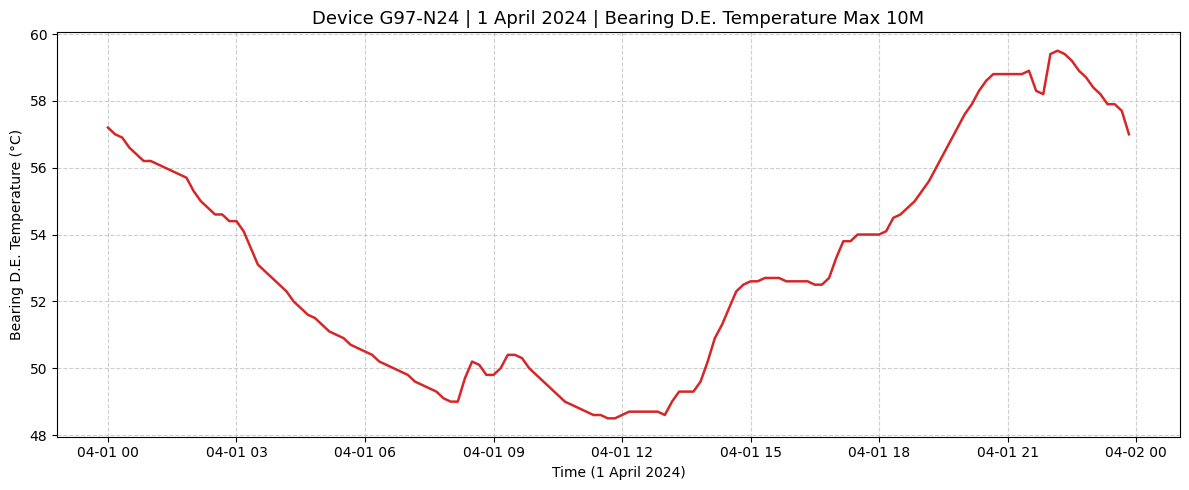

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

file_path = "X-Minutal.csv"
df = pd.read_csv(file_path, sep=None, engine="python", on_bad_lines="skip")

df.columns = df.columns.str.strip()
df = df[df["﻿Device"].eq("G97-N24") & df["Date"].str.startswith("01/04/2024")]
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y %H:%M:%S.%f")

time_tensor = tf.constant(df["Date"].astype("int64").values)  # convert to integer timestamps
temp_tensor = tf.constant(df["Bearing D.E. Temperature max 10M (ºC)"].values, dtype=tf.float32)

time_tensor_norm = (time_tensor - tf.reduce_min(time_tensor)) / (tf.reduce_max(time_tensor) - tf.reduce_min(time_tensor))

dataset = tf.data.Dataset.from_tensor_slices((time_tensor_norm, temp_tensor))

plt.figure(figsize=(12, 5))
plt.plot(df["Date"], temp_tensor.numpy(), color="tab:red", linewidth=1.8)
plt.title("Device G97-N24 | 1 April 2024 | Bearing D.E. Temperature Max 10M", fontsize=13)
plt.xlabel("Time (1 April 2024)")
plt.ylabel("Bearing D.E. Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
